# Importing required libraries

In [21]:
import plotly
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as py
import cufflinks as cf
from plotly.offline import init_notebook_mode,download_plotlyjs 
from IPython.display import Image

In [2]:
# Plotluy offline setup
init_notebook_mode(connected=True)
cf.go_offline()

# Importing The data

In [3]:
data_original = pd.read_csv(r'C:\Users\Vishnu\Desktop\datas\titanic\train.csv')

In [4]:
data=data_original.copy()

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Checking the data type of Ticked feature
data['Ticket'].dtypes

dtype('O')

# As we can see Fare column contains both str and umerical values. So let's convert it into numerical

In [7]:
import re
def extract_number(data):
    result=[]
    for i in data:
        numbers=re.findall(r'\d{3,10}',i)
        if numbers:
            result.extend(numbers)
        else:
            result.extend([np.nan])
    return np.array(result,dtype='float')
ticked_feature=extract_number(data['Ticket'])       

In [8]:
data['Ticket']=np.log(ticked_feature)

# Droping unwanted features

In [9]:
data.drop(['PassengerId'],axis=1,inplace=True)

# Handlig missing values

In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        6
Fare          0
Cabin       687
Embarked      2
dtype: int64

# We have lots of nan vallues in Cabin column so let's drop it

In [11]:
data.drop('Cabin',axis=1,inplace=True)

# And there are some nun values in Age feature so let' fix it.

> #### After comparing all the columns with Age feature, i found that SibSP column has different median for different age group

In [12]:
py.box(data_frame=data,x='SibSp',y='Age')

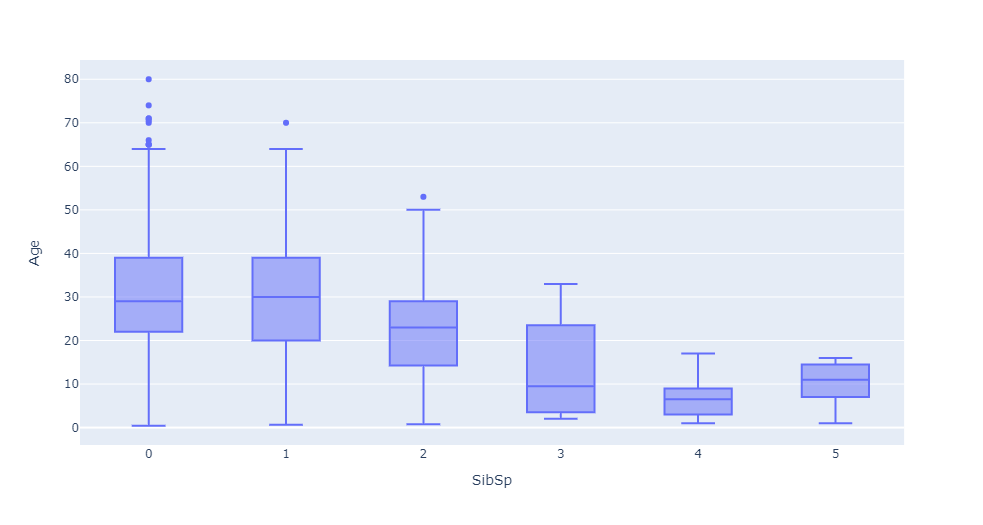

In [22]:
Image(r'C:\Users\Vishnu\Downloads\newplot.png')

> #### As we can see there is some difference in age group with respect to SibSp columns so let's use this mean value to fill nan value in Age column

In [13]:
def fill_Age(data):
    
    for ind in range(len(data)):
        
        if data['SibSp'].iloc[ind]==0:
            data['Age'].iloc[ind]=29
        elif data['SibSp'].iloc[ind] ==1:
            data['Age'].iloc[ind]= 30
        elif data['SibSp'].iloc[ind] ==2:
            data['Age'].iloc[ind]= 23
        elif data['SibSp'].iloc[ind] ==3:
            data['Age'].iloc[ind]= 9.5
        elif data['SibSp'].iloc[ind] ==4:
            data['Age'].iloc[ind]= 6.5
        else:
            data['Age'].iloc[ind]= 11
    return data['Age']

In [14]:
data.Age=fill_Age(data[['Age','SibSp']])

In [15]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      6
Fare        0
Embarked    2
dtype: int64

> #### There is no nun value in Age column

# Also we have 2 null value in Embarked column. let's fill it.

In [16]:
# Copying the original data
new_embarked=data.copy()

In [17]:
new_embarked.dropna(inplace=True)

In [18]:
fig1=py.sunburst(data_frame=new_embarked,path=['Pclass','Sex','Embarked'])
fig1.update_traces(textinfo='label + percent parent')

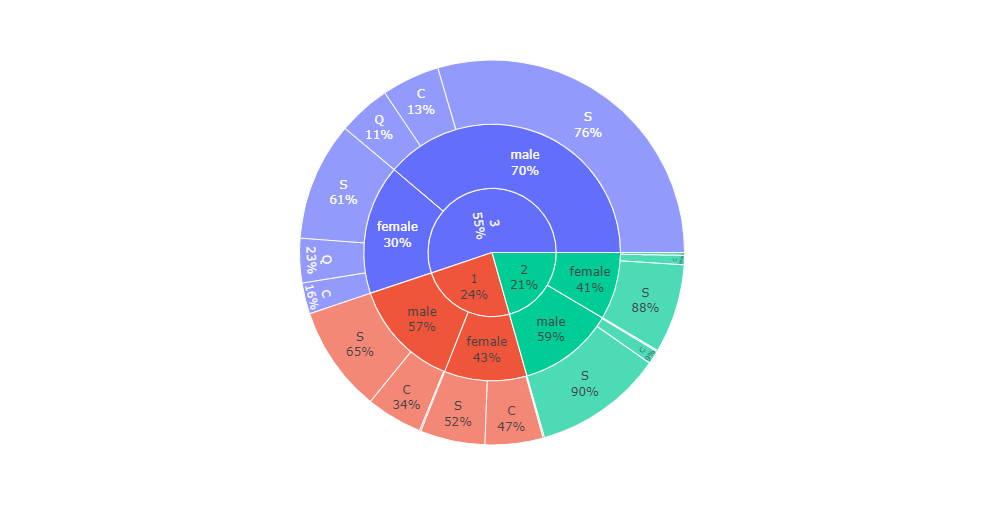

In [25]:
Image(r'C:\Users\Vishnu\Downloads\newplot (6).png')

> #### It is clear that probability of any data point that belongs to S category is very high compare to C and Q

In [19]:
data.Embarked.fillna(data.Embarked.mode(),inplace=True)

In [20]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      6
Fare        0
Embarked    2
dtype: int64

# Exploratory Data Analysis

# 1.How Pclass_feature  impacts Survived

In [21]:
Pclass_feature=data.groupby(['Pclass','Survived']).agg({'Survived':'count'}).rename(columns={"Survived":"Count"}).reset_index()

In [22]:
Pclass_feature

,Pclass,Survived,Count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [23]:
Pclass_figure=py.sunburst(data_frame=Pclass_feature,path=['Pclass','Survived'],values='Count',color='Pclass')

Pclass_figure.update_traces(textinfo='label + percent parent')


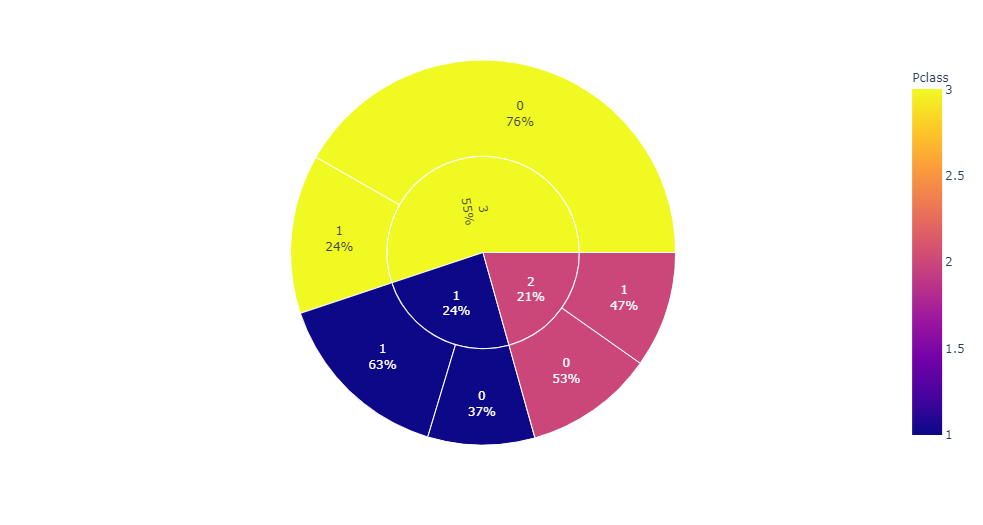

In [26]:
Image(r'C:\Users\Vishnu\Downloads\newplot (2).png')

## Observation

> #### 1. 55% of people were from 3rd class and 76% of prople from 3rd class were died
> #### 2. 24% of the people were from 1st class and 63% of them survived
> #### 3. 21% of the people were from 2nd class and half of them survived and half of them did not.

# 2.How Sex_feature impacts Survived

In [24]:
Sex_feature = data.groupby(['Sex','Survived']).agg({'Survived':'count'}).rename(columns={"Survived":"Count"}).reset_index()
Sex_feature

,Sex,Survived,Count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [25]:
Pclass_figure = py.sunburst(data_frame=Sex_feature,path=['Sex','Survived'],values='Count',color='Sex')
Pclass_figure.update_traces(textinfo='label + percent parent')

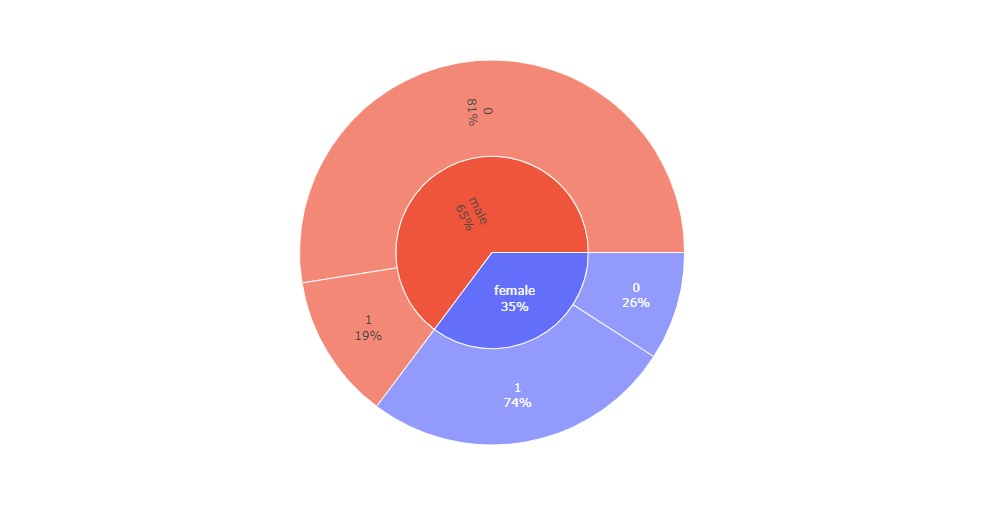

In [27]:
Image(r'C:\Users\Vishnu\Downloads\newplot (3).png')

## Observation:

> #### 1. 65% of the people were male and 35% of the people where female
> #### 2. Most of the male passangers did not survive(81%) and only 19% of the passangers survived
> #### 3. 35% of the passangers were female but most of the female passangers survived

# 3.How Embarked_Feature impacts Survived

In [26]:
embarked_feature = data.groupby(['Embarked','Survived']).agg({"Survived":"count"}).rename(columns={"Survived":"Count"}).reset_index()
embarked_feature

,Embarked,Survived,Count
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217


In [27]:
embarked_figure = py.sunburst(data_frame=embarked_feature,path=['Embarked','Survived'],values='Count',color='Embarked')
embarked_figure.update_traces(textinfo='label + percent parent')

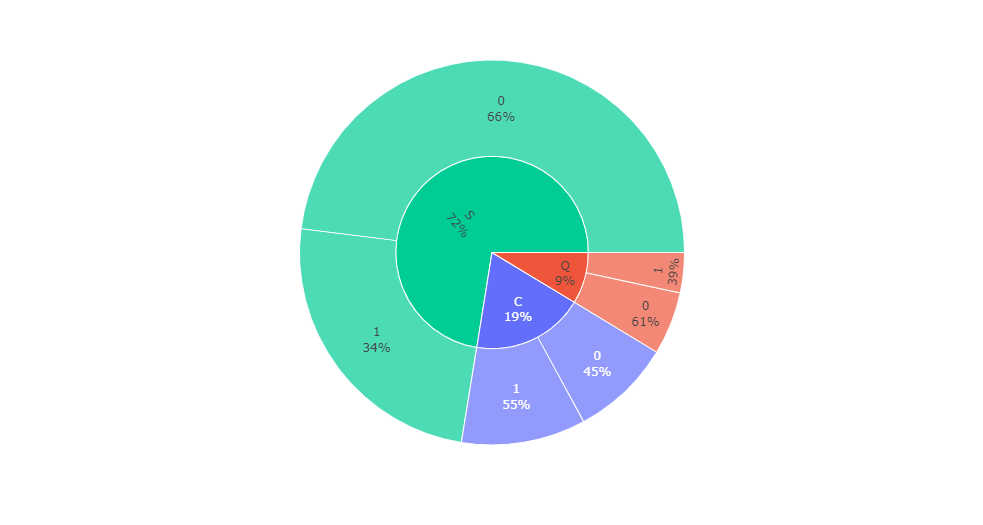

In [28]:
Image(r'C:\Users\Vishnu\Downloads\newplot (4).png')

## Observations:

> #### 1. 72% of the people were rescued from location S
> #### 2. out of them 66% of the people survived and 43% of them did not
> #### 3. 19% of the people were rescued from location C
> #### 4. Out of them Half of themsurvived and half of them did not.
> #### 5. Only 9% of the people were rescued from location Q
> #### 6. out of them 61 % of people survived and 45% of them did not

# 4.All Categorical varibales

In [28]:
py.parallel_categories(data_frame=data,color='Survived')

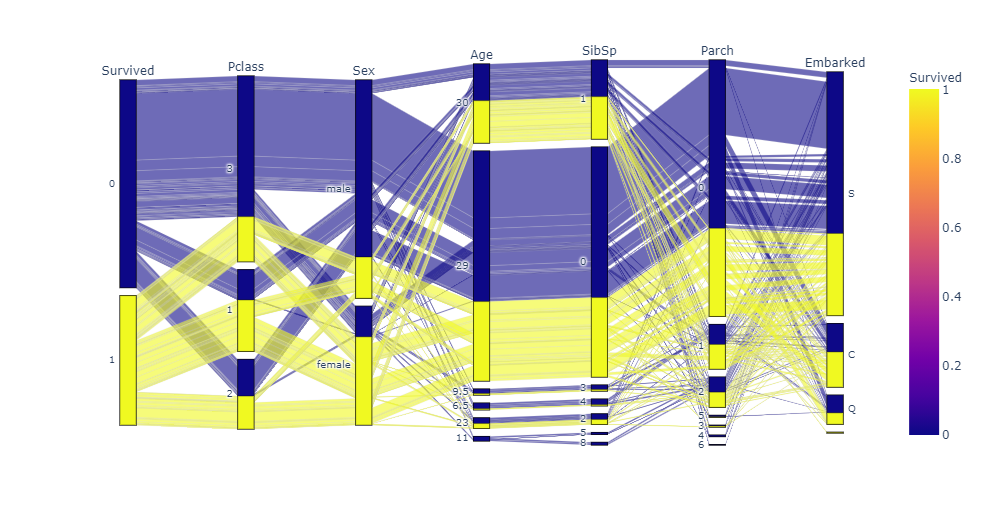

In [29]:
Image(r'C:\Users\Vishnu\Downloads\newplot (5).png')

In [29]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

# 5.How Age column impacts survived 

<AxesSubplot:xlabel='Age', ylabel='Density'>

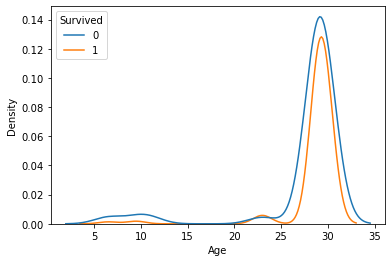

In [30]:
sns.kdeplot(data=data,x='Age',hue='Survived')

## Observation

> #### 1. most of the childern (Age lesser than 10) Survived

# 6.How SibSp_feature Impacts Survived

<AxesSubplot:xlabel='SibSp', ylabel='count'>

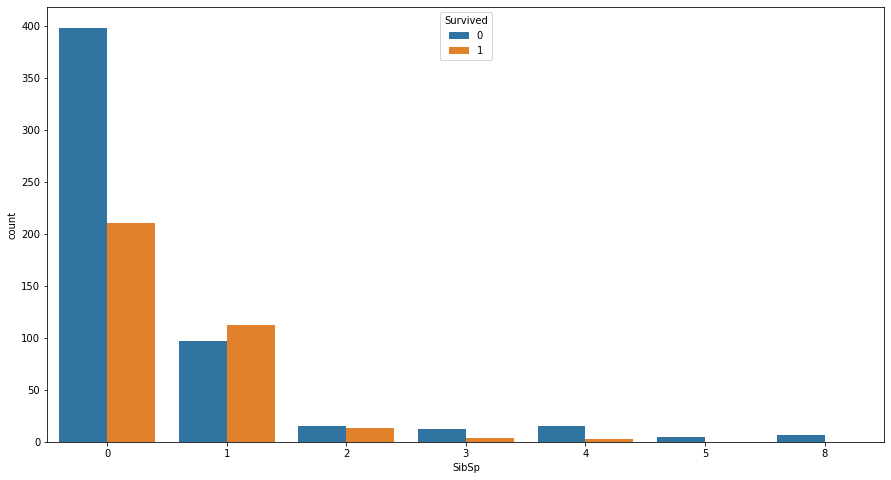

In [31]:
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='SibSp',hue='Survived')

### Observations:

> #### 1. Those who traveled with one SibSp seem to be survived more. But still chances are almost equal

# 7.How Parch_feature Impacts Survived

<AxesSubplot:xlabel='Parch', ylabel='count'>

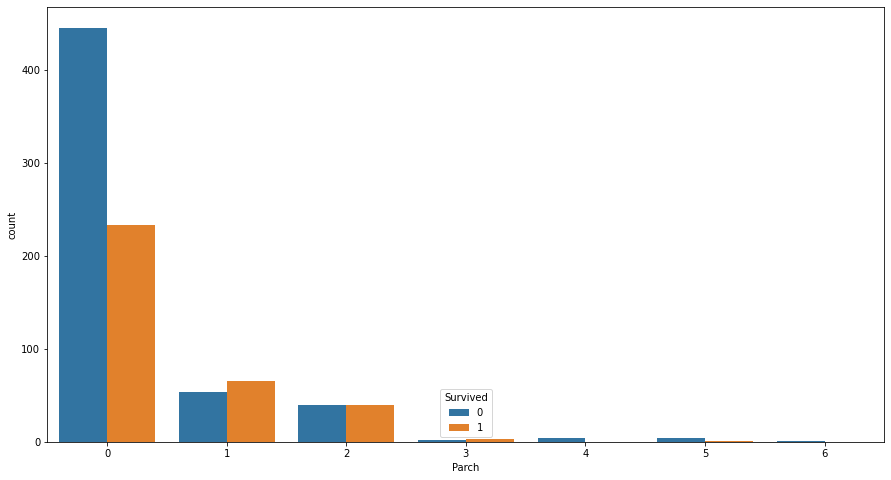

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(data=data,x='Parch',hue='Survived')

### Observations:

> #### 1. The chance of survival is little high for those who traveled with on Parch

# How Bothe SibSP and Parch helps us differentiating target

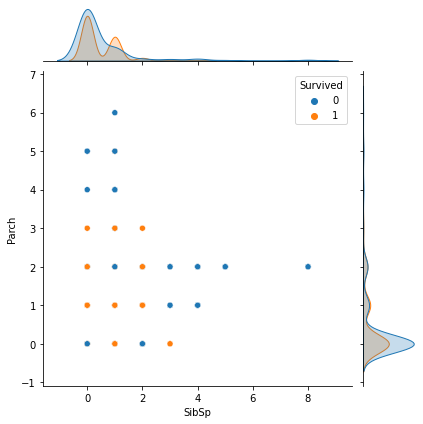

In [33]:
sns.jointplot(data=data,x='SibSp',y='Parch',hue='Survived')

## Observations:

> #### 1. The survival Rate is high for those who travelled with lesser than 2 SibSp and lesser than 3 Parch

# How SibSP,Parch and Pclass together impacts the target

In [34]:
py.scatter_3d(data_frame=data,x='SibSp',y='Parch',z='Pclass',color='Survived')

## Observations:
> #### 1. As we can see SibSp, Parch and Pclass gives us better idea.
> #### 2. The survival rate is igh for Those who traveled in 1st class with lesser number of Parch and SibSp.

# But thses features are not enough to make a good model. So let's create new features.

## Feature 1 : Family Size

In [35]:
Family_size = data['SibSp']+data['Parch']+1

In [36]:
data['family_size']=Family_size

<AxesSubplot:xlabel='family_size', ylabel='Pclass'>

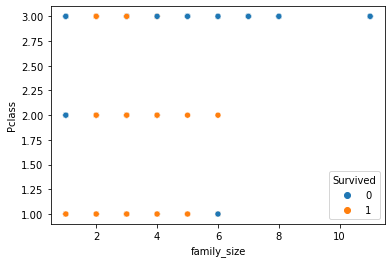

In [37]:
sns.scatterplot(data=data,x='family_size',y='Pclass',hue='Survived')

### Observations:

> #### Now it has become even more clear that the survival rate is high for those who travelled with small family size 

In [38]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'family_size'],
      dtype='object')

# Feature 2: Title

In [39]:
def extract_title(name):
    print(len(name))
    result=[]
    for i in name:
        title = re.findall(r'([A-Za-z]+)\.',i)
        result.append(title[0])
    return result


In [40]:
data['title']=extract_title(data['Name'])

891


In [41]:
data['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Don           1
Lady          1
Capt          1
Ms            1
Sir           1
Mme           1
Jonkheer      1
Name: title, dtype: int64

In [42]:
# Making some modification just to reduce the number of unique values
data['title'] = data['title'].replace(['Mlle','Lady','Ms','Lady'], 'Miss')
data['title'] = data['title'].replace(['Mme'], 'Mrs')
data['title'] = data['title'].replace(['Countess','Capt', 'Col','Don',
                                                'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
# Droping the name feature from the data
data.drop('Name',axis=1,inplace=True)

# Let's See how title feature impacts the target

<AxesSubplot:xlabel='title', ylabel='count'>

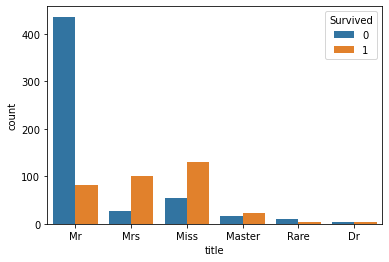

In [43]:
sns.countplot(data=data,x='title',hue='Survived')

## Observations:

> #### 1. The survival rate of Mr is less compare to other titles

# Feature 3 : Age group

In [44]:
# Function to create new feature -Age_Group

def age_group(age):
  
    if age<=15:
        return 'Children'
    elif age<=35:
        return 'Adult'
    elif age <=45:
        return 'Middle Aged'
    elif age<=55:
        return 'Old'
    else:
        return 'Senier Citizen'
    

In [45]:
# Creating the feature
age_groupp=[data['Age'].apply(age_group)]
data['age_group']=age_groupp[0]

In [46]:
data.age_group.value_counts()

Adult       845
Children     46
Name: age_group, dtype: int64

# Let's see can we do anything with age group

In [47]:
age_feature = data.groupby(['age_group','Survived']).agg({"Survived":"count"}).rename(columns={"Survived":"Count"}).reset_index()
age_feature

,age_group,Survived,Count
0,Adult,0,510
1,Adult,1,335
2,Children,0,39
3,Children,1,7


In [48]:
embarked_figure = py.sunburst(data_frame=age_feature,path=['age_group','Survived'],values='Count',color='age_group')
embarked_figure.update_traces(textinfo='label + percent parent')

<AxesSubplot:xlabel='age_group', ylabel='count'>

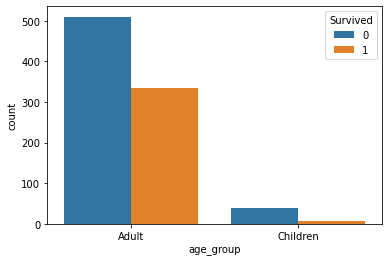

In [49]:
sns.countplot(data=data,x='age_group',hue='Survived')

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>